### Source code tutorial: https://youtu.be/7sz4WpkUIIs?t=1819

Support Vector Machine - SVM - Classification Implementation for Beginners (using python) - Detailed

Cloud and ML Online

# Support Vector Machines

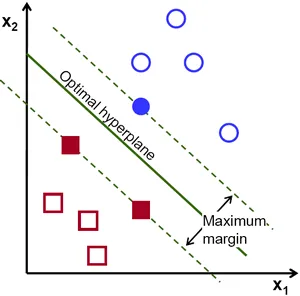 

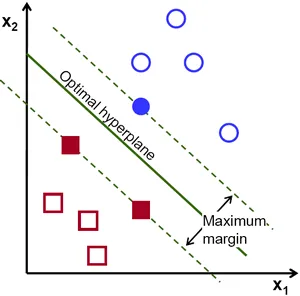

Photo Credit: https://towardsdatascience.com/

- Useful for classifying data points in a N- dimensional space

# 1) Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

# 2) Read csv file

In [3]:
pd_migrane = pd.read_csv("migrane_data.csv")
pd_migrane.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


### 2a) Need to make dictionary for target

In [4]:
# find all unique values under "type"
dif_migrane = pd_migrane["Type"].unique()

dif_migrane

array(['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine'], dtype=object)

In [5]:
#Create dictionary to turn labels to values

migrane_labels_to_numbers = {
    
    "Typical aura with migraine" : 1,
    "Migraine without aura" : 2,
    "Basilar-type aura" : 3,
    "Sporadic hemiplegic migraine": 4,
    "Familial hemiplegic migraine" : 5,
    "Typical aura without migraine" : 6,
    "Other" : 7
    
}

#relabel each list of labels to values
pd_migrane["Type"] = pd_migrane["Type"].map(migrane_labels_to_numbers)

#make updated csv
pd_migrane.to_csv("migrane_dataMod.csv", index = False)

#open new csv

pd_mod_migrane = pd.read_csv("migrane_dataMod.csv").head()

pd_mod_migrane

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,1
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,1


# 3) Analyzing Dataset

## 3a) View Distribution of Labels

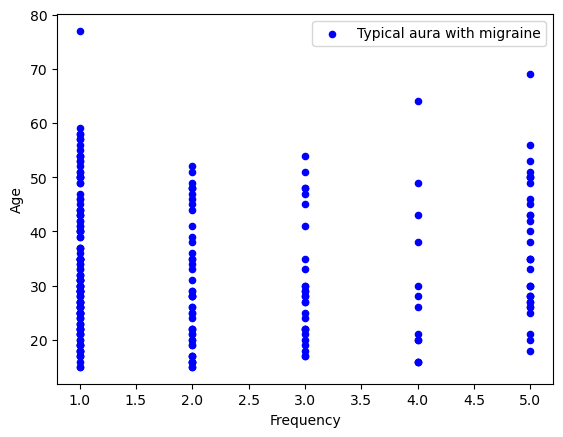

In [6]:
# help(Typical_aura_with_migraine.plot)
pd_mod_migrane = pd.read_csv("migrane_dataMod.csv")

migraine1_df = pd_mod_migrane[pd_mod_migrane["Type"]==1]

axes = migraine1_df.plot(kind = "scatter", x = "Frequency", y = "Age",
                                         color = "blue", label = "Typical aura with migraine")




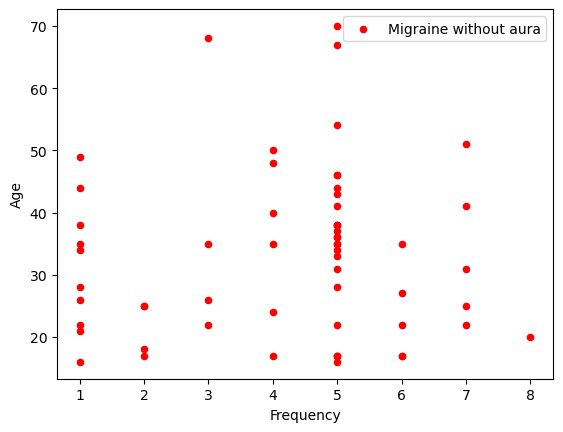

In [7]:
pd_mod_migrane = pd.read_csv("migrane_dataMod.csv")

migraine2_df = pd_mod_migrane[pd_mod_migrane["Type"]==2]

axes = migraine2_df.plot(kind = "scatter", x = "Frequency", y = "Age",
                                         color = "red", label = "Migraine without aura")

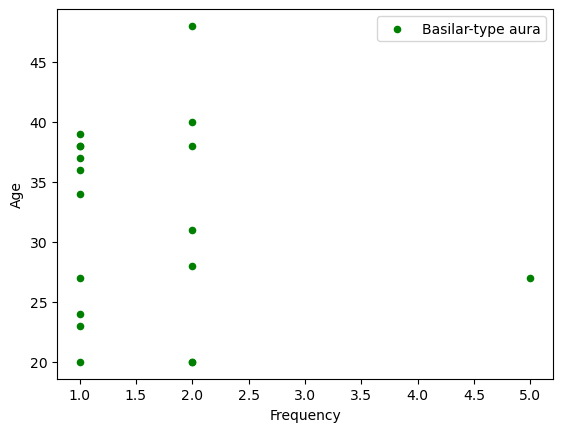

In [8]:
pd_mod_migrane = pd.read_csv("migrane_dataMod.csv")

migraine3_df = pd_mod_migrane[pd_mod_migrane["Type"]==3]

axes = migraine3_df.plot(kind = "scatter", x = "Frequency", y = "Age",
                                         color = "green", label = "Basilar-type aura")

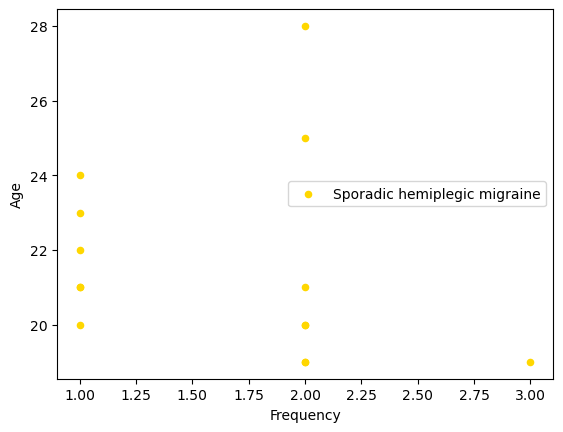

In [9]:
pd_mod_migrane = pd.read_csv("migrane_dataMod.csv")

migraine4_df = pd_mod_migrane[pd_mod_migrane["Type"]==4]

axes = migraine4_df.plot(kind = "scatter", x = "Frequency", y = "Age",
                                         color = "gold", label = "Sporadic hemiplegic migraine")

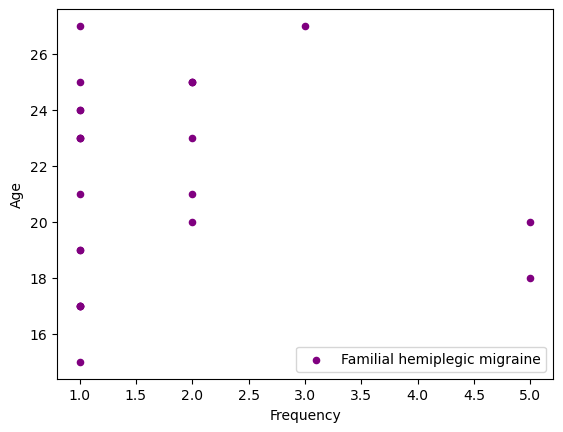

In [10]:
pd_mod_migrane = pd.read_csv("migrane_dataMod.csv")

migraine5_df = pd_mod_migrane[pd_mod_migrane["Type"]==5]

axes = migraine5_df.plot(kind = "scatter", x = "Frequency", y = "Age",
                                         color = "purple", label = "Familial hemiplegic migraine")

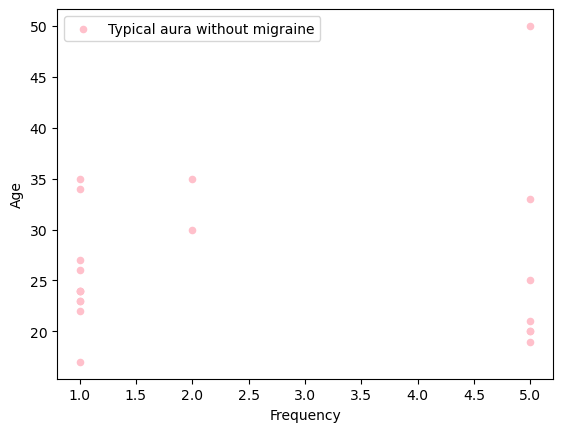

In [11]:
pd_mod_migrane = pd.read_csv("migrane_dataMod.csv")

migraine6_df = pd_mod_migrane[pd_mod_migrane["Type"]==6]

axes = migraine6_df.plot(kind = "scatter", x = "Frequency", y = "Age",
                                         color = "pink", label = "Typical aura without migraine")

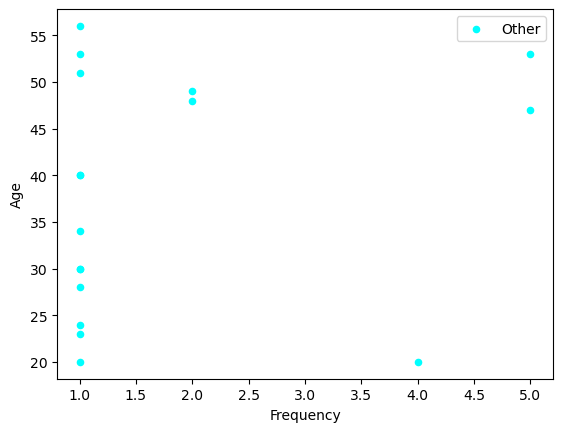

In [12]:
pd_mod_migrane = pd.read_csv("migrane_dataMod.csv")

migraine7_df = pd_mod_migrane[pd_mod_migrane["Type"]==7]

axes = migraine7_df.plot(kind = "scatter", x = "Frequency", y = "Age",
                                         color = "cyan", label = "Other")

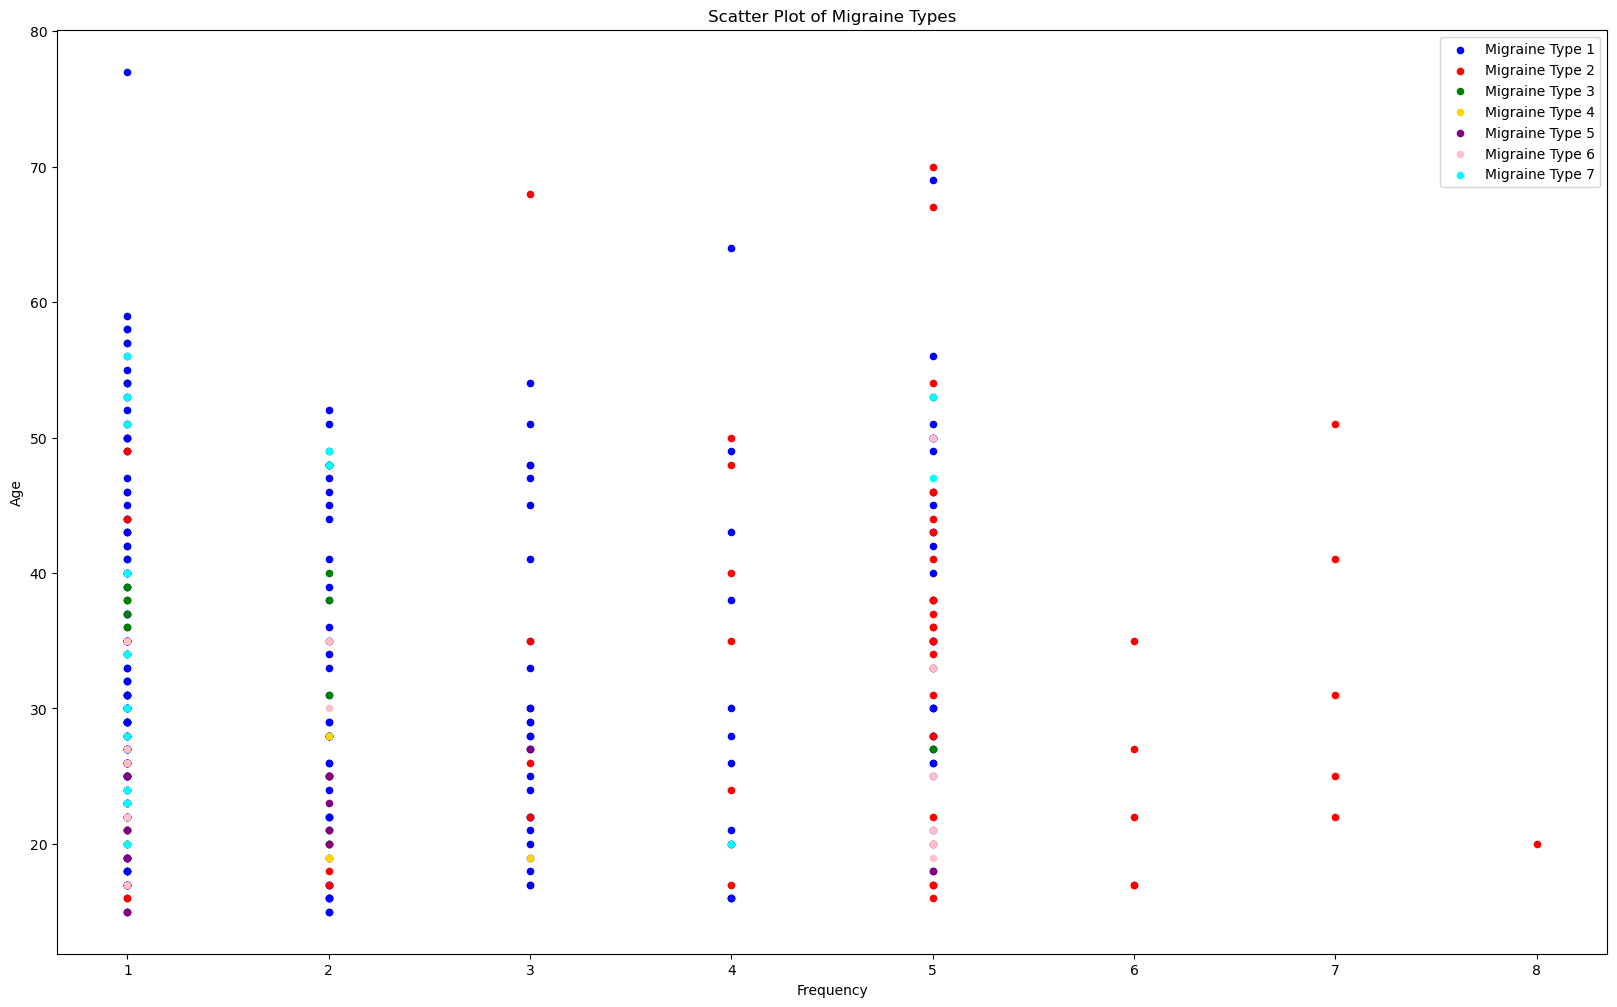

In [13]:
# #Combine all types headaches

# Create a figure and axes with a specific size
plt.figure(figsize=(20, 12))
axes = plt.gca()

# Loop through each type of migraine
for migraine_type, color in zip(range(1, 8), ["blue", "red", "green", "gold", "purple", "pink", "cyan"]):
    migraine_df = pd_mod_migrane[pd_mod_migrane["Type"] == migraine_type]
    migraine_df.plot(kind="scatter", x="Frequency", y="Age", color=color, ax=axes, label=f"Migraine Type {migraine_type}")

# Customize the plot
plt.title("Scatter Plot of Migraine Types")
plt.xlabel("Frequency")
plt.ylabel("Age")
plt.legend()

# Show the plot
plt.show()

## 3b) Number of points under each column

In [14]:
#see number of sample points in dataset for each column

pd_mod_migrane.count()

Age            400
Duration       400
Frequency      400
Location       400
Character      400
Intensity      400
Nausea         400
Vomit          400
Phonophobia    400
Photophobia    400
Visual         400
Sensory        400
Dysphasia      400
Dysarthria     400
Vertigo        400
Tinnitus       400
Hypoacusis     400
Diplopia       400
Defect         400
Ataxia         400
Conscience     400
Paresthesia    400
DPF            400
Type           400
dtype: int64

In [15]:
#Tally number of each data point under each type of headache
label_num = pd_migrane["Type"].value_counts()

label_num

1    247
2     60
5     24
6     20
3     18
7     17
4     14
Name: Type, dtype: int64

# 4) Separating Features Independent Variable (IV) from Dependent Variable (DV)

We are training our SVM model to classify the type of headache a patient has based on their traits. So we need to separate "Type" (DV) from all the other column labels (IV).

In [16]:
pd_mod_migrane.columns

#Get all labels for IV

Var_features = pd_mod_migrane[['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF']
    
]

#List Independent Var
IV_migrane = np.asarray(Var_features)
DV_migrane = np.asarray(pd_mod_migrane["Type"])

#show array of IV -> ready for putting into model
IV_migrane[0:4]

array([[30,  1,  5,  1,  1,  2,  1,  0,  1,  1,  1,  2,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [50,  3,  5,  1,  1,  3,  1,  1,  1,  1,  2,  1,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  0],
       [53,  2,  1,  1,  1,  2,  1,  1,  1,  1,  2,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [45,  3,  5,  1,  1,  3,  1,  0,  1,  1,  2,  2,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  0]], dtype=int64)

# 5) Dividing Data as Train/Test

In [93]:
from sklearn.model_selection import train_test_split

IV_migrane_train, IV_migrane_test, DV_migrane_train, DV_migrane_test=  train_test_split(IV_migrane,DV_migrane, test_size = .25, random_state = 4)

#shape for each variable
IV_migrane_train.shape

#(rows, column) array

(300, 23)

In [94]:
IV_migrane_test.shape

(100, 23)

In [95]:
DV_migrane_train.shape

(300,)

In [96]:
DV_migrane_test.shape

(100,)

# 6) SVM Modelling

In [97]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import precision_score

#using model with training set to see how well model works
clf = svm.SVC(kernel = "rbf", gamma = 'auto', C=1)

clf.fit(IV_migrane_train,DV_migrane_train)

#output model's predicted classifications after training
DV_migrane_predict = clf.predict(IV_migrane_test)



DV_migrane_predict

array([1, 1, 2, 1, 1, 1, 6, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

# 7) Evaluation of Model

In [98]:
from sklearn.metrics import classification_report

print(classification_report(DV_migrane_test,DV_migrane_predict))

              precision    recall  f1-score   support

           1       0.75      0.99      0.85        67
           2       0.80      0.67      0.73        12
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       1.00      0.40      0.57         5
           7       0.00      0.00      0.00         3

    accuracy                           0.76       100
   macro avg       0.36      0.29      0.31       100
weighted avg       0.65      0.76      0.69       100



C:\Users\Megan Tran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Megan Tran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Megan Tran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
